<a href="https://colab.research.google.com/github/Cloudy34/AI_Projects/blob/main/NeuroNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install ucimlrepo -q

In [26]:
from ucimlrepo import fetch_ucirepo

In [27]:
data = fetch_ucirepo(id = 19)

X = data.data.features
y = data.data.targets

In [28]:
import pandas as pd

df = pd.DataFrame(X)
df['y'] = y

df.head()

,buying,maint,doors,persons,lug_boot,safety,y
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [29]:
df['y'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: y, dtype: int64

In [30]:
df.isnull().sum() #cheack for null values

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
y           0
dtype: int64

In [31]:
# encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col]) # transfroming the data types

#df = df.astype('int') forcing datatypes to be  int

df.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
y           int64
dtype: object

In [32]:
from sklearn.model_selection import train_test_split as tts

newX  = df.drop('y', axis = 1)
newy  = df['y']

In [33]:
Xtr,Xts, ytr,yts = tts(newX,newy, test_size = 0.2, random_state=42)

print(Xtr.shape, ytr.shape)
print(Xts.shape, yts.shape)


(1382, 6) (1382,)
(346, 6) (346,)


In [34]:
df.shape  #tensorflow, pytorch

(1728, 7)

In [35]:
import numpy as np

from keras.models import  Sequential
from keras.layers import  Dense

import tensorflow as tf

print(tf.__version__)

2.14.0


In [36]:
num_classes = int(len(df['y'].unique()))
num_features = int(Xtr.shape[1])

print(num_classes, num_features)


4 6


In [37]:
model = Sequential()

#input layer

model.add(Dense(128, input_dim = num_features, activation ='relu'))

#hidden layers

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))

#output layer

model.add(Dense(num_classes, activation = 'softmax'))

model.compile(
    loss = 'sparse_categorical_crossentropy' , # Slides on Decision tree
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               896       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 11364 (44.39 KB)
Trainable params: 11364 (44.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history = model.fit(Xtr, ytr, epochs = 200, validation_split = 0.2)

Epoch 1/200
35/35 [==============================] - 1s 7ms/step - loss: 1.0479 - accuracy: 0.6489 - val_loss: 0.9381 - val_accuracy: 0.6498
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 0.7219 - accuracy: 0.7231 - val_loss: 0.8253 - val_accuracy: 0.6751
Epoch 3/200
35/35 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.7285 - val_loss: 0.7452 - val_accuracy: 0.7040
Epoch 4/200
35/35 [==============================] - 0s 6ms/step - loss: 0.6098 - accuracy: 0.7448 - val_loss: 0.6971 - val_accuracy: 0.7256
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 0.5653 - accuracy: 0.7656 - val_loss: 0.6440 - val_accuracy: 0.7292
Epoch 6/200
35/35 [==============================] - 0s 5ms/step - loss: 0.5140 - accuracy: 0.7846 - val_loss: 0.6066 - val_accuracy: 0.7473
Epoch 7/200
35/35 [==============================] - 0s 6ms/step - loss: 0.4624 - accuracy: 0.8054 - val_loss: 0.5266 - val_accuracy: 0.7870
Epoch 8/200
3

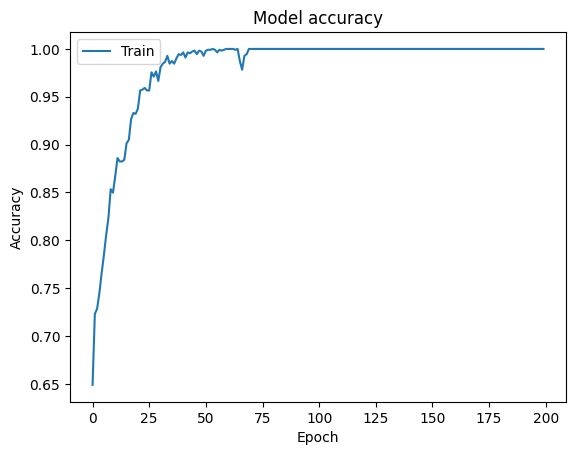

In [39]:
import matplotlib.pyplot as plt
# Plot a graph of the traingin process
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

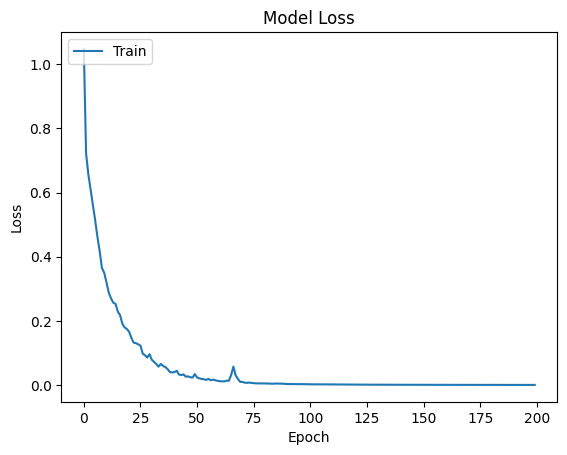

In [40]:
import matplotlib.pyplot as plt
# Plot a graph of the traingin process
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

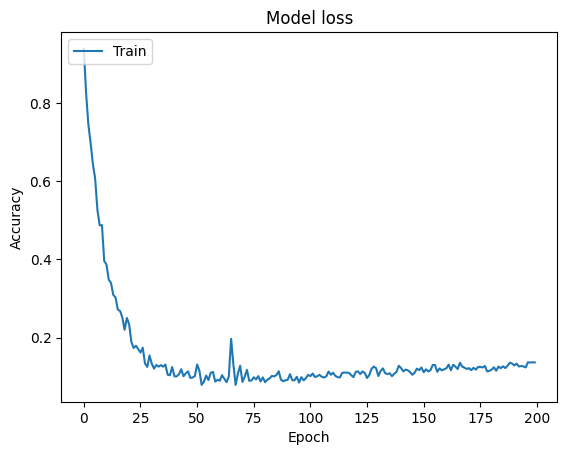

In [41]:
import matplotlib.pyplot as plt
# Plot a graph of the traingin process
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

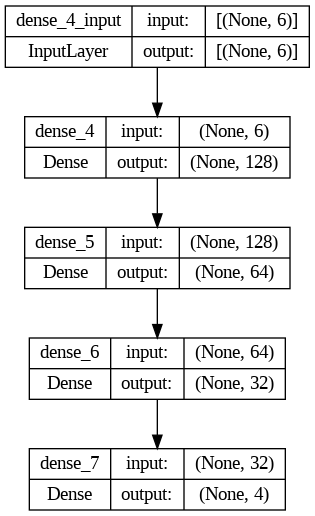

In [43]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True, show_layer_names = True, to_file = '145538.png')